In [93]:
import pandas as pd

In [94]:
wards = pd.read_pickle("C:/Users/HP/Downloads/ward.p")

In [95]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [96]:
wards.shape

(50, 4)

In [10]:
census = pd.read_pickle("C:/Users/HP/Downloads/census.p")

In [11]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [12]:
census.shape

(50, 6)

## a. Inner Join

In [13]:
# on argument tells the method that we want to merge the two Databrames on the 'ward' column.
wards_census = wards.merge(census, on='ward')
wards_census.head()

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [14]:
wards_census.shape

(50, 9)

In [15]:
# we provide a tuple to the suffixes argument so the overlapping columns in the left table are given the suffix '_ward'
# and the right ones are given '_cen'.

wards_census = wards.merge(census, on = 'ward', suffixes = ('_ward','_cen'))
wards_census.head()

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


### One to One relationship

## b. One to Many relationship

In [17]:
# Within each ward, there are many businesses. We will merge the wards table with a table of licensed businesses in each ward.
# licenses table holds info such as the business address and ward the business is located within.

licenses = pd.read_pickle("C:/Users/HP/Downloads/licenses.p")
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [19]:
ward_licenses = wards.merge(licenses,on='ward',suffixes = ('_ward','_lic'))
ward_licenses.head()

,ward,alderman,address_ward,zip_ward,account,aid,business,address_lic,zip_lic
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [20]:
ward_licenses.shape

(10000, 9)

In [30]:
#num_of_business = ward_licenses.groupby('ward')['business'].agg('count') --> This is a series, sort_values won't work
num_of_business = ward_licenses.groupby('ward').agg({'business':'count'}) # --> This is a dataframe

num_of_business = num_of_business.sort_values('ward')
num_of_business.head()

,business
ward,
1,253
10,130
11,201
12,255
13,101


In [32]:
b = pd.read_pickle("C:/Users/HP/Downloads/business_owners.p")


## c. Merging

### Single merge

### Merging multiple tables

# Merging Tables With Different Join Types

In [97]:
movies = pd.read_pickle("C:/Users/HP/Downloads/movies.p")

In [98]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [9]:
print(movies.shape)

(4803, 4)


In [10]:
taglines = pd.read_pickle("C:/Users/HP/Downloads/taglines.p")

In [11]:
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [12]:
taglines.shape

(3955, 2)

## a. Left Join

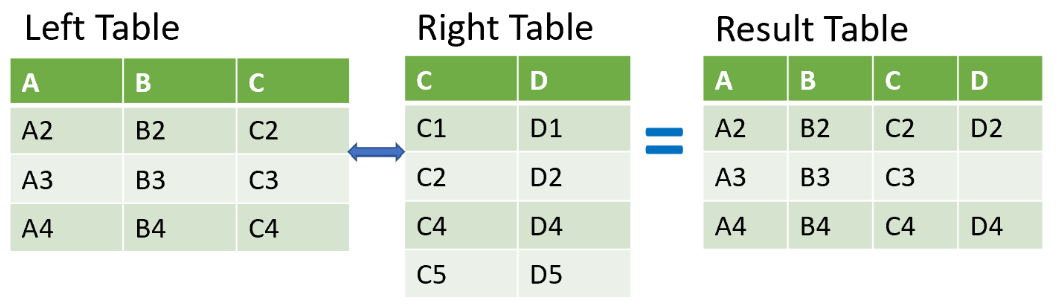

In [14]:
movies_taglines = movies.merge(taglines, on = 'id', how = 'left')

In [15]:
movies_taglines.head()

,id,title,popularity,release_date,tagline
0,257,Oliver Twist,20.415572,2005-09-23,NaN
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure


## b. Right Join

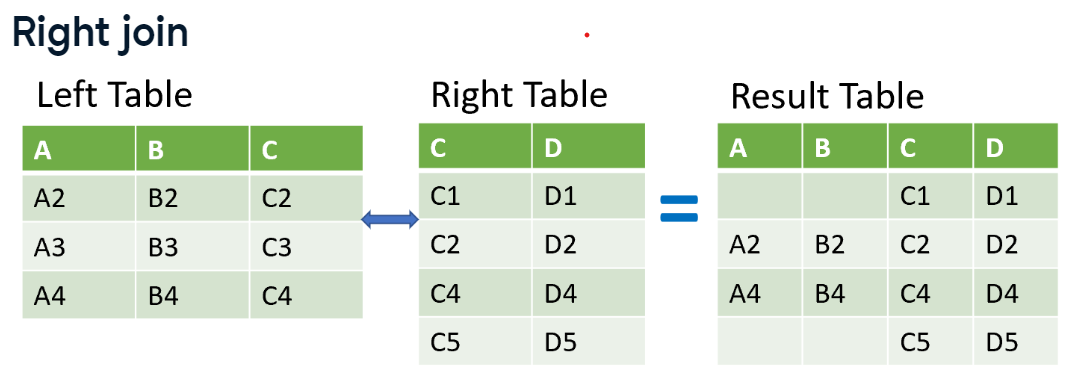

In [99]:
movie_to_genres = pd.read_pickle("C:/Users/HP/Downloads/movie_to_genres.p")

In [100]:
movie_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [18]:
tv_genre = movie_to_genres[movie_to_genres['genre'] == 'TV Movie']
tv_genre.head()

,movie_id,genre
4998,10947,TV Movie
5994,13187,TV Movie
7443,22488,TV Movie
10061,78814,TV Movie
10790,153397,TV Movie


In [22]:
# the column with the movie ID number in the movies table is named 'id', and in the tv_genre table it is named 'movie_id'.
# to solve this we will use two arguments, left_on (for left table) and right_on (for right table)
tv_movies = movies.merge(tv_genre, how = 'right', left_on = 'id', right_on = 'movie_id')
tv_movies.head()

,id,title,popularity,release_date,movie_id,genre
0,10947,High School Musical,16.536374,2006-01-20,10947,TV Movie
1,13187,A Charlie Brown Christmas,8.701183,1965-12-09,13187,TV Movie
2,22488,Love's Abiding Joy,1.128559,2006-10-06,22488,TV Movie
3,78814,We Have Your Husband,0.102003,2011-11-12,78814,TV Movie
4,153397,Restless,0.812776,2012-12-07,153397,TV Movie


## c. Outer Join

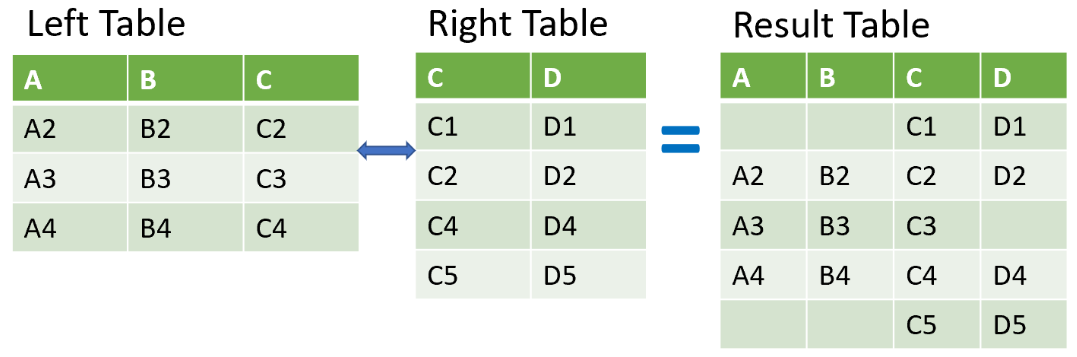

In [23]:
family = movie_to_genres[movie_to_genres['genre'] == 'Family']
family.head(3)

,movie_id,genre
5,12,Family
33,35,Family
111,105,Family


In [24]:
comedy = movie_to_genres[movie_to_genres['genre'] == 'Comedy']
comedy.head(3)

,movie_id,genre
1,5,Comedy
7,13,Comedy
35,35,Comedy


In [26]:
family_comedy = family.merge(comedy, on = 'movie_id', suffixes = ('_fam','_com'), how = 'outer')
family_comedy.head()

,movie_id,genre_fam,genre_com
0,12,Family,NaN
1,35,Family,Comedy
2,105,Family,Comedy
3,118,Family,Comedy
4,129,Family,NaN


## d. Merging a table to itself

In [4]:
sequel = pd.read_pickle("C:/Users/HP/Downloads/sequels.p")

In [6]:
sequel.head(2)

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863


In [10]:
original_sequels = sequel.merge(sequel, right_on = 'id', left_on = 'sequel', suffixes = ('_org','_seq'), how = 'left')
original_sequels.head()

,id_org,title_org,sequel_org,id_seq,title_seq,sequel_seq
0,19995,Avatar,<NA>,<NA>,NaN,<NA>
1,862,Toy Story,863,863,Toy Story 2,10193
2,863,Toy Story 2,10193,10193,Toy Story 3,<NA>
3,597,Titanic,<NA>,<NA>,NaN,<NA>
4,24428,The Avengers,<NA>,<NA>,NaN,<NA>


## d. Merging tables using their indexes

In [56]:
cast = pd.read_pickle("C:/Users/HP/Downloads/casts.p")

In [60]:
df = cast[cast['name'] == 'Samuel L. Jackson']
samuel = df
samuel.head()
#cast['name'].value_counts(sort = True)

,movie_id,cast_id,character,gender,id,name
1,184,3,Ordell Robbie,2,2231,Samuel L. Jackson
9,319,13,Big Don,2,2231,Samuel L. Jackson
0,326,2,Neville Flynn,2,2231,Samuel L. Jackson
9,329,138,Arnold,2,2231,Samuel L. Jackson
8,393,21,Rufus,2,2231,Samuel L. Jackson


In [61]:
samuel = samuel[['movie_id','cast_id','name']].reset_index(drop = True).set_index(['movie_id','cast_id'])
samuel.head()

,,name
movie_id,cast_id,
184,3,Samuel L. Jackson
319,13,Samuel L. Jackson
326,2,Samuel L. Jackson
329,138,Samuel L. Jackson
393,21,Samuel L. Jackson


In [63]:
character = df[['movie_id','cast_id','character']].reset_index(drop = True).set_index(['movie_id','cast_id'])
character.head()

,,character
movie_id,cast_id,
184,3,Ordell Robbie
319,13,Big Don
326,2,Neville Flynn
329,138,Arnold
393,21,Rufus


In [87]:
samuel_casts = samuel.merge(character, on = ['movie_id','cast_id'])
samuel_casts.head()

,,name,character
movie_id,cast_id,,
184,3,Samuel L. Jackson,Ordell Robbie
319,13,Samuel L. Jackson,Big Don
326,2,Samuel L. Jackson,Neville Flynn
329,138,Samuel L. Jackson,Arnold
393,21,Samuel L. Jackson,Rufus


In [101]:
samuel_casts.shape

(67, 2)

### Index merge with left-on and right-on

In [102]:
movies = movies.reset_index(drop = True).set_index('id')


In [92]:
movies.head(2)

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12


In [103]:
movie_to_genres = movie_to_genres.reset_index(drop = True).set_index('movie_id')

In [104]:
movie_to_genres.head(2)

,genre
movie_id,
5,Crime
5,Comedy


In [118]:
movies_genres = movies.merge(movie_to_genres,left_on = 'id',right_on = 'movie_id', right_index = True)
movies_genres.head()

,title,popularity,release_date,genre
id,,,,
257,Oliver Twist,20.415572,2005-09-23,Crime
257,Oliver Twist,20.415572,2005-09-23,Drama
257,Oliver Twist,20.415572,2005-09-23,Family
14290,Better Luck Tomorrow,3.877036,2002-01-12,Crime
14290,Better Luck Tomorrow,3.877036,2002-01-12,Drama
